---
## **Lab03 - Principle Component Analysis**
---


---
### **Importing libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

---
### **Loading datasets**

In [2]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine.shape

(1599, 12)

In [4]:
# Null count
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values

In [5]:
# Data description
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Loading winequality-white dataset**

In [6]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
white_wine.shape

(4898, 12)

In [8]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values

In [9]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Since both 'red_wine' and 'white_wine' datasets have the same features and no missing values we can merge the two datasets for furthur preprocessing and analysis tasks.** 

---
### **Merging data sets**

In [10]:
# Add a column to each dataframe to indicate the color of the wine
red_wine['red'] = 1
white_wine['red'] = 0

In [11]:
# Combine the dataframes
wines = pd.concat([red_wine, white_wine],ignore_index=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


---
### **wines dataset analysis**

In [12]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [13]:
wines.shape

(6497, 13)

In [14]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


**Let's define the quality categories for wines -- bad, average, or great as follows:**

**bad is when for wines that have a quality <= 5**

**average is when a wine has a quality of 6 or 7**

**great is when a wine has a quality of >= 8**

In [15]:
# copy the original data so that we're free to make changes
wines_copy = wines.copy()

# use the 'cut' function to reduce a variable down to the aforementioned bins (inclusive boundaries)
wines_copy['quality'] = pd.cut(wines_copy['quality'],[0,5,7,10], labels=[0,1,2])
wines_copy.loc[wines_copy['quality'] == 1]

# drop the un-needed columns
x_data = wines_copy.drop(['quality'], axis=1)
y_data = wines_copy['quality']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2, random_state=8, stratify=y_data)

# previews data to check if we correctly constructed the labels
print(wines['quality'].head())
print(wines_copy['quality'].head())

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64
0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [16]:
y_data.value_counts()

quality
1    3915
0    2384
2     198
Name: count, dtype: int64

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='red', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='volatil

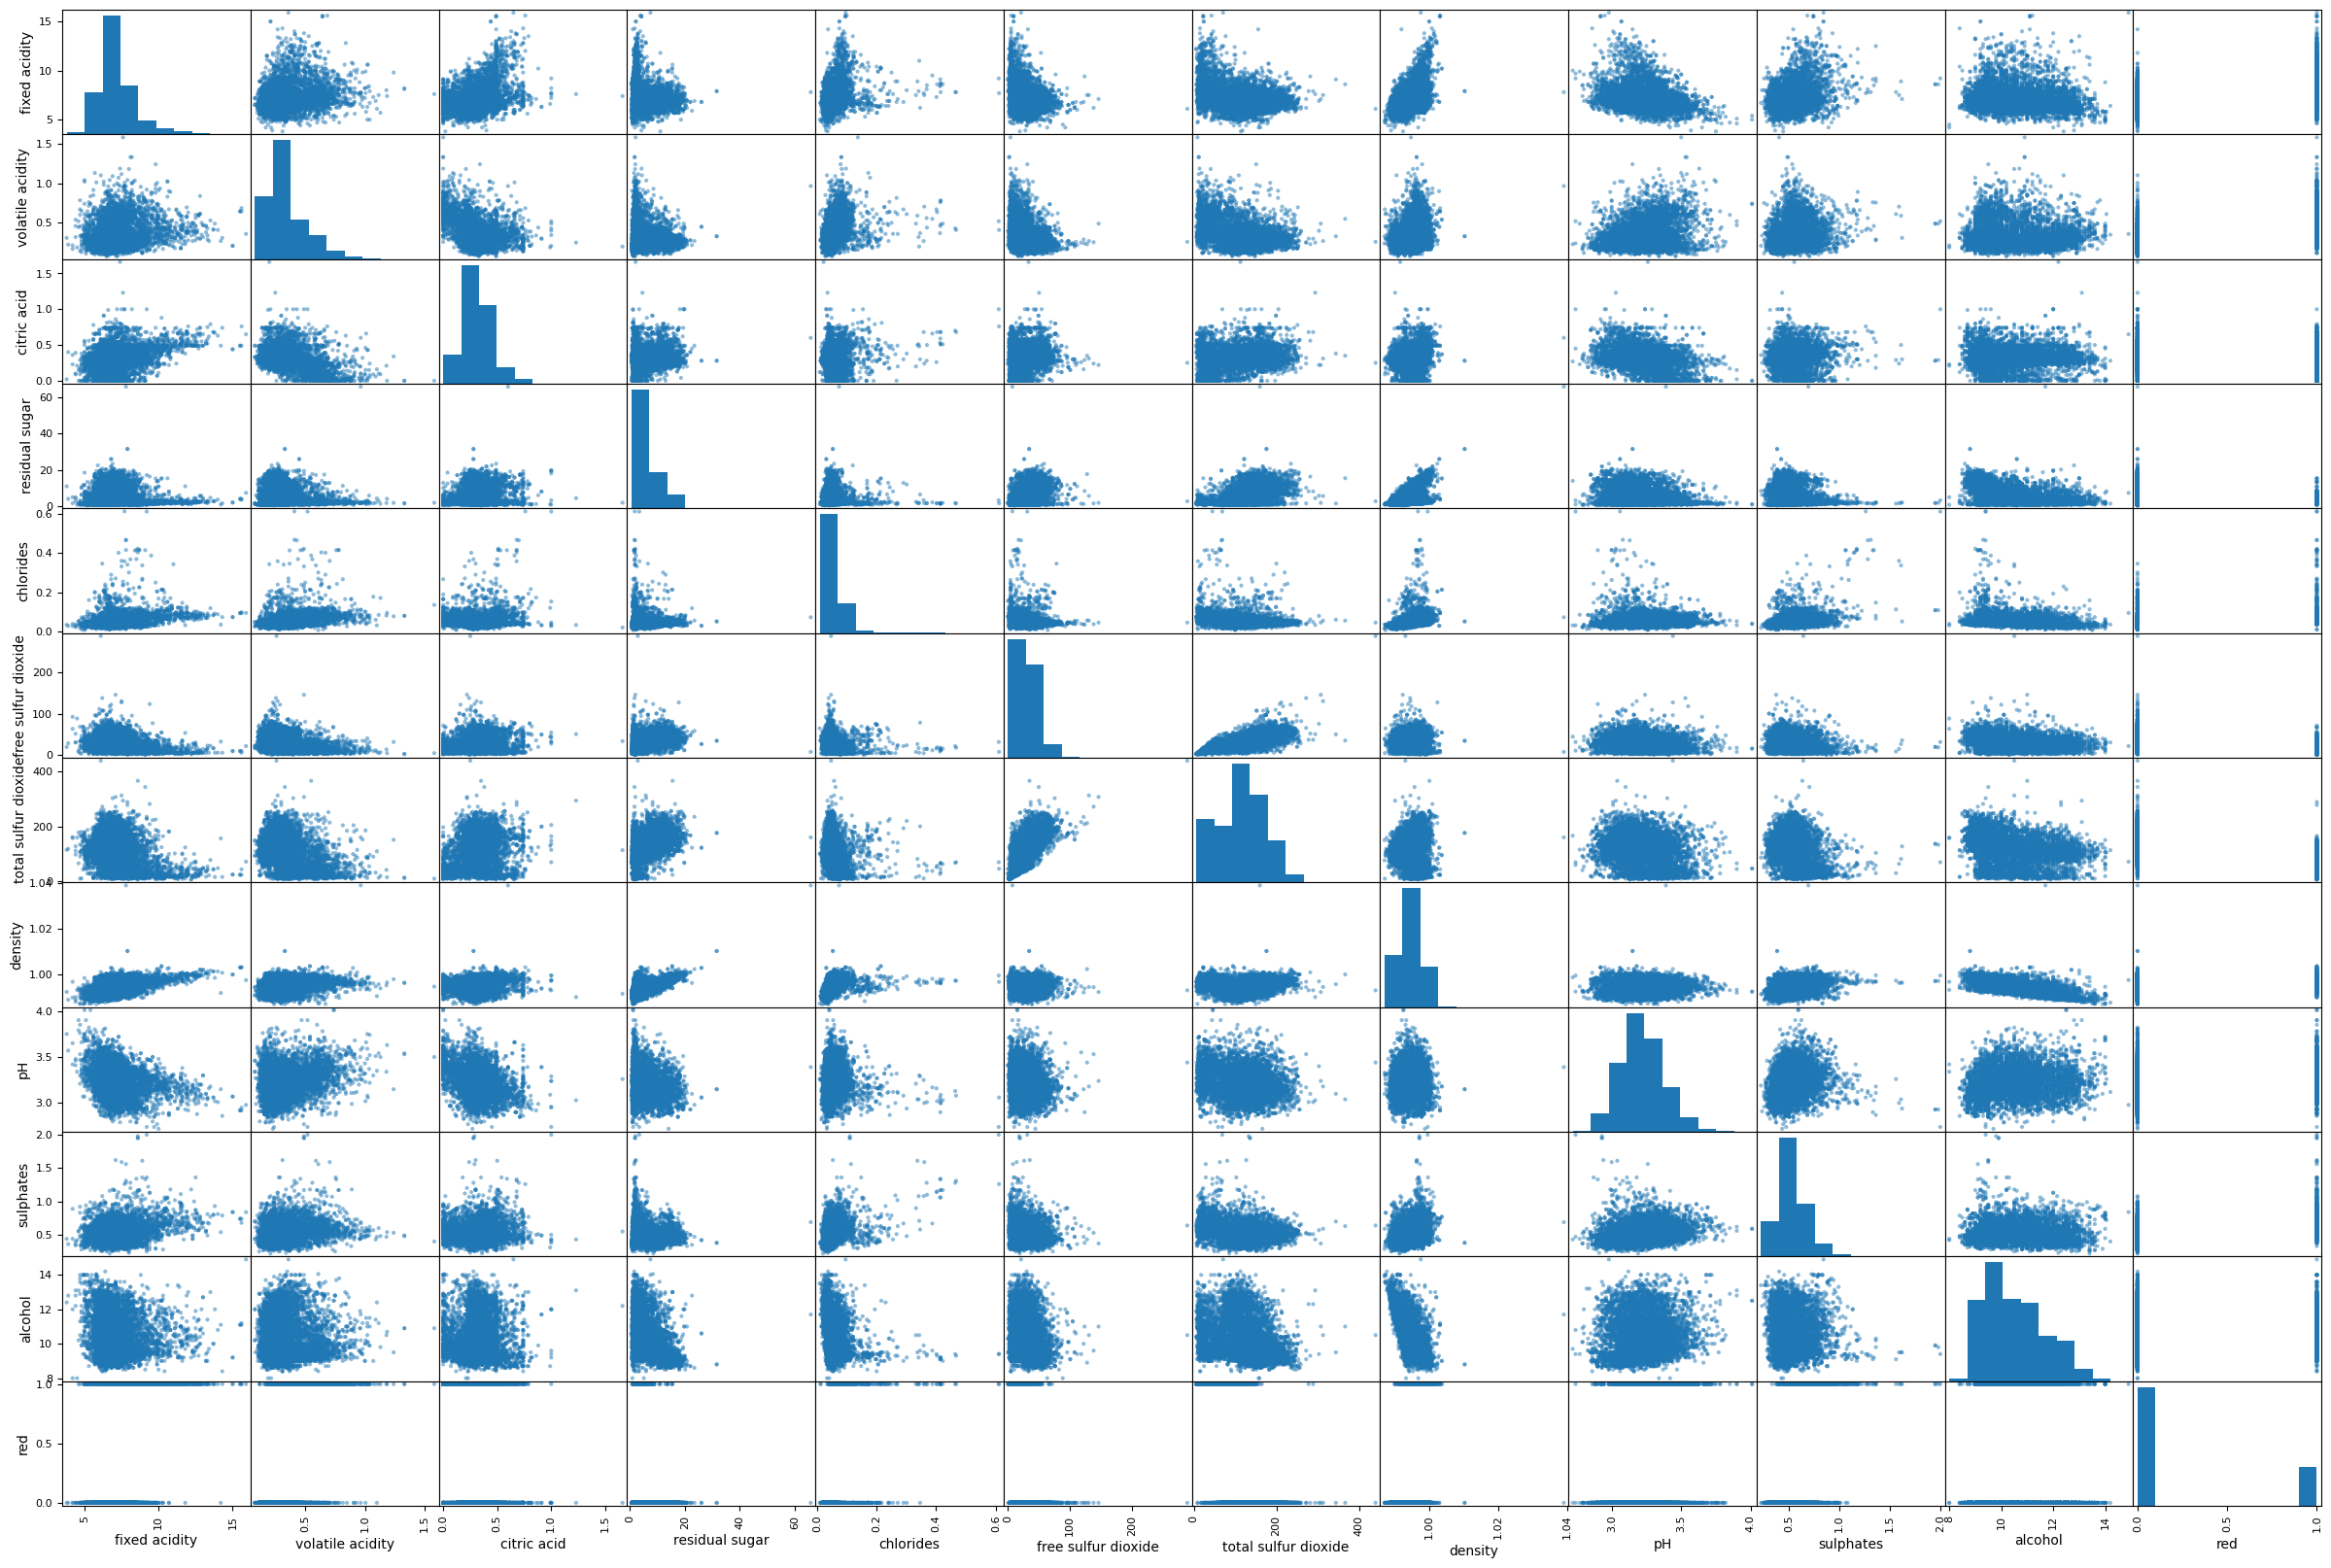

In [17]:
# checking for correlations between features
from pandas.plotting import scatter_matrix
scatter_matrix(wines_copy, figsize=(30,20))

It looks like there aren't any particularly strong correlations among the predictors. So we're safe to keep them all.

---
### **Prediction Models**

**1.Maximum Likelihood Estimate - MLE**

In [18]:
mle_class = y_data.value_counts().idxmax()
mle_train_accuracy = len(y_train.loc[y_train == mle_class]) / len(y_train)
mle_test_accuracy = len(y_test.loc[y_test == mle_class]) / len(y_test)

scores = [[mle_train_accuracy, mle_test_accuracy]]
names = ['MLE']
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
MLE,0.602655,0.602308


**MLE gives a predictive accuracy is 60.0% on the test set**

**2.Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000000, solver='lbfgs', multi_class='ovr', max_iter=10000).fit(x_train,y_train)
print("Coefficients:", lr.coef_)
print("Intercepts:", lr.intercept_)

Coefficients: [[-7.46134232e-03  4.67878658e+00  4.29063690e-01 -6.61410035e-02
   1.89921369e+00 -1.54399023e-02  6.18730973e-03  4.82865933e+00
  -3.56780124e-01 -1.80849026e+00 -9.40565103e-01 -3.11126215e-01]
 [ 2.72122208e-02 -4.38105992e+00 -5.41719337e-01  4.92802150e-02
  -1.64026546e+00  1.05809536e-02 -4.93891983e-03 -3.64045499e+00
   4.09842963e-01  1.60192213e+00  6.75138795e-01  2.95808340e-01]
 [ 4.04902305e-02 -1.67444791e+00  8.28817955e-01  9.38329314e-02
  -2.63494339e+00  2.27694064e-02 -7.55161460e-03 -8.65662009e+00
   1.06276634e+00  3.67347504e-01  9.04342009e-01 -7.50583407e-01]]
Intercepts: [ 4.84457177 -3.66316129 -8.66260304]


In [20]:
lr_train_accuracy = lr.score(x_train, y_train)
lr_test_accuracy = lr.score(x_test, y_test)

# appends results to our dataframe
names.append('Logistic Regression')
scores.append([lr_train_accuracy, lr_test_accuracy])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

,Train Accuracy,Test Accuracy
MLE,0.602655,0.602308
Logistic Regression,0.715605,0.714615


**The model accuracy is much better than MLE. This can be further improved by cross-validation.**

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV

logit_regr_lasso = LogisticRegressionCV(solver='liblinear', multi_class='ovr', penalty='l1', max_iter=100000, cv=10)
logit_regr_lasso.fit(x_train,y_train) # fit

y_train_pred_lasso = logit_regr_lasso.predict(x_train) # predict the test set
y_test_pred_lasso = logit_regr_lasso.predict(x_test) # predict the test set

train_score_lasso = accuracy_score(y_train, y_train_pred_lasso) # get train accuracy
test_score_lasso = accuracy_score(y_test, y_test_pred_lasso) # get test accuracy

names.append('Logistic Regression w/ CV + Lasso')
scores.append([train_score_lasso, test_score_lasso])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
MLE,0.602655,0.602308
Logistic Regression,0.715605,0.714615
Logistic Regression w/ CV + Lasso,0.714643,0.713846


**Accuracy is not improved by cross validation**

---
### **Dimensionality Reduction**

Let's use PCA to shrink the problem down to 2 dimensions (with as little loss as possible) and handle the redundant features that pose difficulties forlogistic regression model.

We need to equalize the variance of each feature before applying PCA; otherwise, certain dimensions will dominate the scaling. Our PCA dimensions would just be the features with the largest spread.

Let's first perform PCA with 2 components.

#### **1) PCA with Two Principle Components**

In [22]:
num_components = 2

# scale the datasets
scale_transformer = StandardScaler(copy=True).fit(x_train)
x_train_scaled = scale_transformer.transform(x_train)
x_test_scaled = scale_transformer.transform(x_test)

# reduce dimensions
pca_transformer = PCA(num_components).fit(x_train_scaled)
x_train_2d = pca_transformer.transform(x_train_scaled)
x_test_2d =  pca_transformer.transform(x_test_scaled)

print(x_train_2d.shape)
x_train_2d[0:5,:]

(5197, 2)


array([[-0.70269209, -1.29478807],
       [-1.95370693,  2.95246548],
       [-1.78457056,  0.85532164],
       [-1.24564712,  0.66718074],
       [-1.79701612, -1.2306774 ]])

Let's visualize the distribution of wines with Bad, Average and Great qualities with respect to these principle components

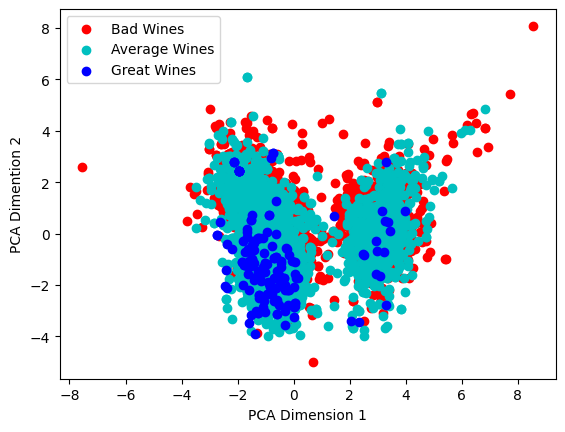

In [23]:
colors = ['r','c','b']
label_text = ["Bad Wines", "Average Wines", "Great Wines"]

# and we loop over the different groups
for cur_quality in [0,1,2]:
    cur_df = x_train_2d[y_train==cur_quality]
    plt.scatter(cur_df[:,0], cur_df[:,1], c = colors[cur_quality], label=label_text[cur_quality])

# all plots need labels
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimention 2")
plt.legend();

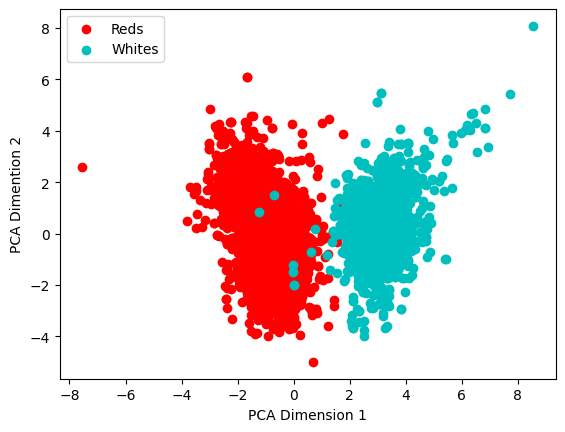

In [24]:
# notice that we set up lists to track each group's plotting color and label
colors = ['r','c','b']
label_text = ["Reds", "Whites"]

# and we loop over the different groups
for cur_color in [0,1]:
    cur_df = x_train_2d[x_train['red']==cur_color]
    plt.scatter(cur_df[:,0], cur_df[:,1], c = colors[cur_color], label=label_text[cur_color])
    
# all plots need labels
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimention 2")
plt.legend();

Let's investigate how much of the original data's structure the 2-D PCA captures. We'll look at the explained_variance_ratio_ portion of the PCA fit.

### *Varience Explained*

In [25]:
var_explained = pca_transformer.explained_variance_ratio_
print("Variance explained by each PCA component:", var_explained)
print("Total Variance Explained:", np.sum(var_explained))

Variance explained by each PCA component: [0.31657619 0.21142542]
Total Variance Explained: 0.5280016077339545


**The first PCA dimension captures 31.7% of the variance in the data, and the second PCA dimension adds another 21.1%. Together, we've captured about half(i.e. 52.8%) of the total variation in the training data with just these two dimensions.** 

Now, let's check the accuracy of the logistic regression model on PCA-transformed data with and without cross-validation.

### *Model Accuracy*

In [26]:
lr = LogisticRegression(C=1000000, solver='lbfgs', multi_class='ovr', max_iter=10000).fit(x_train_2d,y_train)

lr_pca_train_accuracy = lr.score(x_train_2d, y_train)
lr_pca_test_accuracy = lr.score(x_test_2d, y_test)

names.append('Logistic Regression w/ PCA')
scores.append([lr_pca_train_accuracy, lr_pca_test_accuracy])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
MLE,0.602655,0.602308
Logistic Regression,0.715605,0.714615
Logistic Regression w/ CV + Lasso,0.714643,0.713846
Logistic Regression w/ PCA,0.608043,0.606923


In [35]:
names2 = ['Logistic Regression w/ PCA 2D', 'Logistic Regression w/ CV + Lasso + PCA 2D']
scores2 = [[lr_pca_train_accuracy, lr_pca_test_accuracy], [train_score_lasso_pca, test_score_lasso_pca]]
df_results2 = pd.DataFrame(scores2, index=names2, columns=['Train Accuracy', 'Test Accuracy'])
df_results2

,Train Accuracy,Test Accuracy
Logistic Regression w/ PCA 2D,0.608043,0.606923
Logistic Regression w/ CV + Lasso + PCA 2D,0.601693,0.596923


In [34]:
#Show only the train and test accuraies of Logistic Regression w/ CV + Lasso and Logistic Regression w/ PCA in the table
df_results.loc[['Logistic Regression w/ CV + Lasso', 'Logistic Regression w/ PCA'], ['Train Accuracy', 'Test Accuracy']]
df_results

,Train Accuracy,Test Accuracy
MLE,0.602655,0.602308
Logistic Regression,0.715605,0.714615
Logistic Regression w/ CV + Lasso,0.714643,0.713846
Logistic Regression w/ PCA,0.608043,0.606923
Logistic Regression w/ CV + Lasso + PCA,0.601886,0.597692
Logistic Regression w/ PCA 10,0.608043,0.606923
Logistic Regression w/ CV + Lasso + PCA 10,0.601693,0.596923


In [27]:
#With cross-validation
logit_regr_lasso_pca = LogisticRegressionCV(solver='liblinear', multi_class='ovr', penalty='l1', max_iter=100000, cv=10)
logit_regr_lasso_pca.fit(x_train_2d,y_train) # fit

y_train_pred_lasso_pca = logit_regr_lasso_pca.predict(x_train_2d) # predict the test set
y_test_pred_lasso_pca = logit_regr_lasso_pca.predict(x_test_2d) # predict the test set

train_score_lasso_pca = accuracy_score(y_train, y_train_pred_lasso_pca) # get train accuracy
test_score_lasso_pca = accuracy_score(y_test, y_test_pred_lasso_pca) # get test accuracy

names.append('Logistic Regression w/ CV + Lasso + PCA')
scores.append([train_score_lasso_pca, test_score_lasso_pca])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
MLE,0.602655,0.602308
Logistic Regression,0.715605,0.714615
Logistic Regression w/ CV + Lasso,0.714643,0.713846
Logistic Regression w/ PCA,0.608043,0.606923
Logistic Regression w/ CV + Lasso + PCA,0.601886,0.597692


---
#### **2) PCA with 10 Principle Components**

In [28]:
num_components = 10

# reduce dimensions
pca_transformer_10d = PCA(num_components).fit(x_train_scaled)
x_train_10d = pca_transformer.transform(x_train_scaled)
x_test_10d =  pca_transformer.transform(x_test_scaled)

print(x_train_10d.shape)
x_train_10d[0:5,:]

(5197, 2)


array([[-0.70269209, -1.29478807],
       [-1.95370693,  2.95246548],
       [-1.78457056,  0.85532164],
       [-1.24564712,  0.66718074],
       [-1.79701612, -1.2306774 ]])

### *Variance Explained*

In [29]:
# Calculate explained variance ratio
explained_variance_ratio_10d = pca_transformer_10d.explained_variance_ratio_
print("Variance explained by each PCA component:", explained_variance_ratio_10d)

cumulative_variance_10d = np.cumsum(explained_variance_ratio_10d)
print("\nCumulative Variance Explained by 10 PCA Components:", cumulative_variance_10d)

# Print cumulative variance explained by using n PCA dimensions for n=1 through 10
print("\nCumulative Variance Explained by 1 through 10 PCA Components:")
for i in range(num_components):
    print(f"{i+1} components: {cumulative_variance_10d[i]}")

Variance explained by each PCA component: [0.31657619 0.21142542 0.13083329 0.08099387 0.06032249 0.05102768
 0.04504901 0.0412853  0.02937533 0.02165742]

Cumulative Variance Explained by 10 PCA Components: [0.31657619 0.52800161 0.65883489 0.73982876 0.80015126 0.85117894
 0.89622794 0.93751324 0.96688857 0.98854598]

Cumulative Variance Explained by 1 through 10 PCA Components:
1 components: 0.3165761851880703
2 components: 0.5280016077339544
3 components: 0.6588348930034021
4 components: 0.7398287638987409
5 components: 0.8001512579456904
6 components: 0.8511789353739815
7 components: 0.8962279423035223
8 components: 0.9375132374519285
9 components: 0.9668885657714653
10 components: 0.9885459819991305


**We can clearly see that, increasing the number of principle components have increased the explained variance gradually resulting a cumulative variance of 98.85% with 10 omponents.**

### *Model Accuracy*

In [30]:
lr = LogisticRegression(C=1000000, solver='lbfgs', multi_class='ovr', max_iter=10000).fit(x_train_10d,y_train)

lr_pca_train_accuracy = lr.score(x_train_10d, y_train)
lr_pca_test_accuracy = lr.score(x_test_10d, y_test)

names.append('Logistic Regression w/ PCA 10')
scores.append([lr_pca_train_accuracy, lr_pca_test_accuracy])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
MLE,0.602655,0.602308
Logistic Regression,0.715605,0.714615
Logistic Regression w/ CV + Lasso,0.714643,0.713846
Logistic Regression w/ PCA,0.608043,0.606923
Logistic Regression w/ CV + Lasso + PCA,0.601886,0.597692
Logistic Regression w/ PCA 10,0.608043,0.606923


In [31]:
#With cross-validation
logit_regr_lasso_pca = LogisticRegressionCV(solver='liblinear', multi_class='ovr', penalty='l1', max_iter=100000, cv=10)
logit_regr_lasso_pca.fit(x_train_10d,y_train) # fit

y_train_pred_lasso_pca = logit_regr_lasso_pca.predict(x_train_10d) # predict the test set
y_test_pred_lasso_pca = logit_regr_lasso_pca.predict(x_test_10d) # predict the test set

train_score_lasso_pca = accuracy_score(y_train, y_train_pred_lasso_pca) # get train accuracy
test_score_lasso_pca = accuracy_score(y_test, y_test_pred_lasso_pca) # get test accuracy

names.append('Logistic Regression w/ CV + Lasso + PCA 10')
scores.append([train_score_lasso_pca, test_score_lasso_pca])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
MLE,0.602655,0.602308
Logistic Regression,0.715605,0.714615
Logistic Regression w/ CV + Lasso,0.714643,0.713846
Logistic Regression w/ PCA,0.608043,0.606923
Logistic Regression w/ CV + Lasso + PCA,0.601886,0.597692
Logistic Regression w/ PCA 10,0.608043,0.606923
Logistic Regression w/ CV + Lasso + PCA 10,0.601693,0.596923


---
### **Comparison of PCA with 2 components and 10 components**

In [32]:
# Compare with 2D PCA
explained_variance_ratio_2d = pca_transformer.explained_variance_ratio_
print("\nExplained Variance by the First Two Components:")
print("2D PCA:", var_explained)
print("10D PCA:", explained_variance_ratio_10d[:2])



Explained Variance by the First Two Components:
2D PCA: [0.31657619 0.21142542]
10D PCA: [0.31657619 0.21142542]


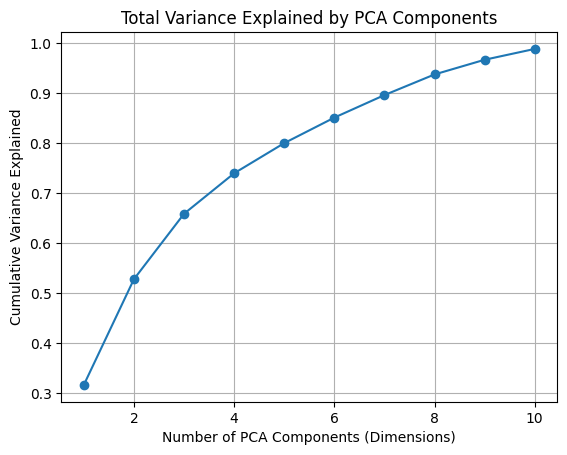

In [33]:
# Plot number of PCA dimensions against total variance explained
plt.plot(range(1, num_components + 1), cumulative_variance_10d, marker='o')
plt.xlabel('Number of PCA Components (Dimensions)')
plt.ylabel('Cumulative Variance Explained')
plt.title('Total Variance Explained by PCA Components')
plt.grid(True)
plt.show()